# ITERATIVE LEAST-LIKELY CLASS METHOD

In [1]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                     weights='imagenet')
pretrained_model.trainable = False

# img_rows, img_cols, channels = 224, 224, 3

# ImageNet labels
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

# Helper function to preprocess the image so that it can be inputted in MobileNetV2
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
  image = image[None, ...]
  return image

# Helper function to extract labels from probability vector
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

# Helper function to extract the least likely label from probability vector
def get_least_likely_imagenet_label(probs):
  return decode_predictions(probs, top=1000)[0][999]

14540800/14536120 [==============================] - 0s 0us/step


inspired by https://arxiv.org/pdf/1607.02533.pdf

Iteration 1

0.8866927
0.02699739
0.0058649075
0.0023368692
0.0014590599


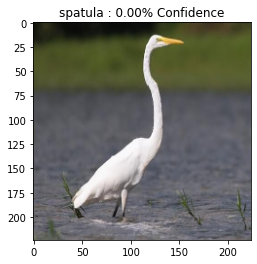

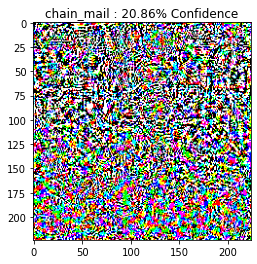

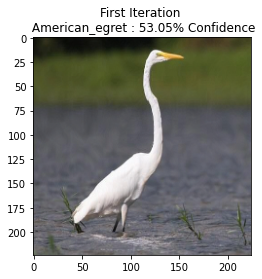

In [25]:
import cv2
import numpy as np

image = cv2.imread('American egret132.jpg')
image = np.flip(image, axis=2)

image = preprocess(image)
image_probs = pretrained_model.predict(image)
print(decode_predictions(image_probs)[0][0][2])
print(decode_predictions(image_probs)[0][1][2])
print(decode_predictions(image_probs)[0][2][2])
print(decode_predictions(image_probs)[0][3][2])
print(decode_predictions(image_probs)[0][4][2])


plt.figure()
plt.imshow(image[0]*0.5+0.5) # To change [-1, 1] to [0,1]
_, ll_image_class, ll_class_confidence = get_least_likely_imagenet_label(image_probs)

plt.title('{} : {:.2f}% Confidence'.format(ll_image_class, ll_class_confidence*100))
plt.show()

loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_ll_adversarial_pattern(input_image, input_ll_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_ll_label, prediction)


  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

# Get the input label of the image.
#labrador_retriever_index = 208
ll_label_index = 749 #quill
ll_label = tf.one_hot(ll_label_index, image_probs.shape[-1])
ll_label = tf.reshape(ll_label, (1, image_probs.shape[-1]))

perturbations = create_ll_adversarial_pattern(image, ll_label)
_, pertLabel, pertConfidence = get_imagenet_label(pretrained_model.predict(perturbations))
plt.title('{} : {:.2f}% Confidence'.format(pertLabel, pertConfidence*100))
plt.imshow(perturbations[0]*0.5+0.5); # To change [-1, 1] to [0,1]

def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  plt.imshow(image[0]*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
  plt.show()

alpha = 2/256
description = 'First Iteration'

adv_x = image - alpha*perturbations
adv_x = tf.clip_by_value(adv_x, -1, 1)
display_images(adv_x, description)

Have to do multiple iterations because I have to input the lables by hand

Iteration 2

0.1322176
0.033343513
0.028931713
0.019735653
0.019251373


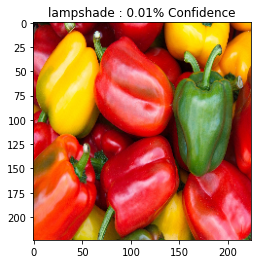

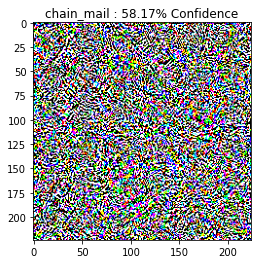

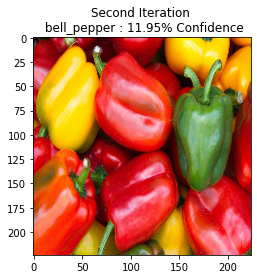

In [17]:
image = adv_x

image_probs = pretrained_model.predict(image)
print(decode_predictions(image_probs)[0][0][2])
print(decode_predictions(image_probs)[0][1][2])
print(decode_predictions(image_probs)[0][2][2])
print(decode_predictions(image_probs)[0][3][2])
print(decode_predictions(image_probs)[0][4][2])

plt.figure()
plt.imshow(image[0]*0.5+0.5) # To change [-1, 1] to [0,1]
_, ll_image_class, ll_class_confidence = get_least_likely_imagenet_label(image_probs)

plt.title('{} : {:.2f}% Confidence'.format(ll_image_class, ll_class_confidence*100))
plt.show()

# Get the input label of the image.
ll_label_index = 619 #lampshade
ll_label = tf.one_hot(ll_label_index, image_probs.shape[-1])
ll_label = tf.reshape(ll_label, (1, image_probs.shape[-1]))

perturbations = create_ll_adversarial_pattern(image, ll_label)
_, pertLabel, pertConfidence = get_imagenet_label(pretrained_model.predict(perturbations))
plt.title('{} : {:.2f}% Confidence'.format(pertLabel, pertConfidence*100))
plt.imshow(perturbations[0]*0.5+0.5); # To change [-1, 1] to [0,1]

description = 'Second Iteration'

adv_x = image - alpha*perturbations
adv_x = tf.clip_by_value(adv_x, -1, 1)
display_images(adv_x, description)

Iteration 3

0.119492
0.020577636
0.012477357
0.00541887
0.0047655497


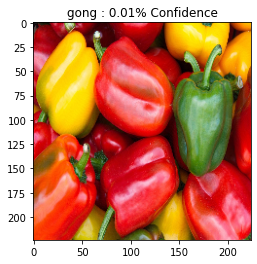

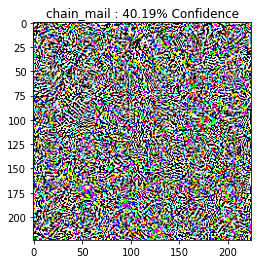

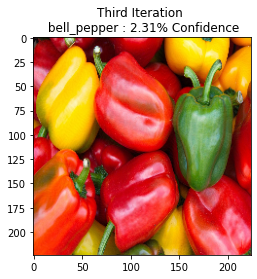

In [18]:
image = adv_x

image_probs = pretrained_model.predict(image)
print(decode_predictions(image_probs)[0][0][2])
print(decode_predictions(image_probs)[0][1][2])
print(decode_predictions(image_probs)[0][2][2])
print(decode_predictions(image_probs)[0][3][2])
print(decode_predictions(image_probs)[0][4][2])

plt.figure()
plt.imshow(image[0]*0.5+0.5) # To change [-1, 1] to [0,1]
_, ll_image_class, ll_class_confidence = get_least_likely_imagenet_label(image_probs)

plt.title('{} : {:.2f}% Confidence'.format(ll_image_class, ll_class_confidence*100))
plt.show()

# Get the input label of the image.
ll_label_index = 577 #gong, tam-tam
ll_label = tf.one_hot(ll_label_index, image_probs.shape[-1])
ll_label = tf.reshape(ll_label, (1, image_probs.shape[-1]))

perturbations = create_ll_adversarial_pattern(image, ll_label)
_, pertLabel, pertConfidence = get_imagenet_label(pretrained_model.predict(perturbations))
plt.title('{} : {:.2f}% Confidence'.format(pertLabel, pertConfidence*100))
plt.imshow(perturbations[0]*0.5+0.5); # To change [-1, 1] to [0,1]

description = 'Third Iteration'

adv_x = image - alpha*perturbations
adv_x = tf.clip_by_value(adv_x, -1, 1)
display_images(adv_x, description)

Iteration 4

0.023066038
0.0111067975
0.0074334736
0.0059832907
0.0051143053


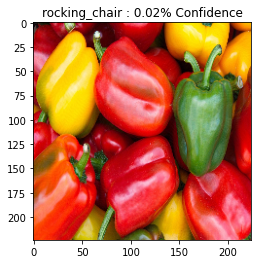

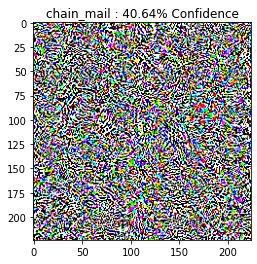

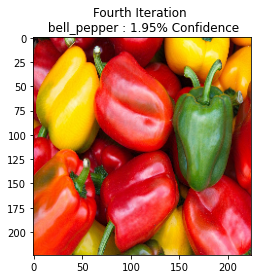

In [19]:
image = adv_x

image_probs = pretrained_model.predict(image)
print(decode_predictions(image_probs)[0][0][2])
print(decode_predictions(image_probs)[0][1][2])
print(decode_predictions(image_probs)[0][2][2])
print(decode_predictions(image_probs)[0][3][2])
print(decode_predictions(image_probs)[0][4][2])

plt.figure()
plt.imshow(image[0]*0.5+0.5) # To change [-1, 1] to [0,1]
_, ll_image_class, ll_class_confidence = get_least_likely_imagenet_label(image_probs)

plt.title('{} : {:.2f}% Confidence'.format(ll_image_class, ll_class_confidence*100))
plt.show()

# Get the input label of the image.
ll_label_index = 765 #rocking chair
ll_label = tf.one_hot(ll_label_index, image_probs.shape[-1])
ll_label = tf.reshape(ll_label, (1, image_probs.shape[-1]))

perturbations = create_ll_adversarial_pattern(image, ll_label)
_, pertLabel, pertConfidence = get_imagenet_label(pretrained_model.predict(perturbations))
plt.title('{} : {:.2f}% Confidence'.format(pertLabel, pertConfidence*100))
plt.imshow(perturbations[0]*0.5+0.5); # To change [-1, 1] to [0,1]

description = 'Fourth Iteration'

adv_x = image - alpha*perturbations
adv_x = tf.clip_by_value(adv_x, -1, 1)
display_images(adv_x, description)

Iteration 5

0.019522648
0.0067749247
0.0054428536
0.003987412
0.003856078


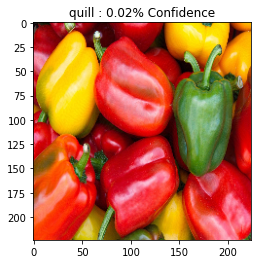

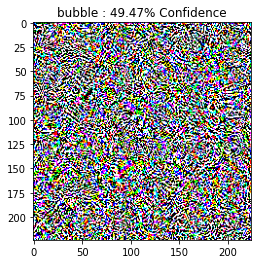

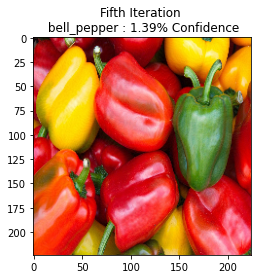

In [20]:
image = adv_x

image_probs = pretrained_model.predict(image)
print(decode_predictions(image_probs)[0][0][2])
print(decode_predictions(image_probs)[0][1][2])
print(decode_predictions(image_probs)[0][2][2])
print(decode_predictions(image_probs)[0][3][2])
print(decode_predictions(image_probs)[0][4][2])

plt.figure()
plt.imshow(image[0]*0.5+0.5) # To change [-1, 1] to [0,1]
_, ll_image_class, ll_class_confidence = get_least_likely_imagenet_label(image_probs)

plt.title('{} : {:.2f}% Confidence'.format(ll_image_class, ll_class_confidence*100))
plt.show()

# Get the input label of the image.
ll_label_index = 749 #quill
ll_label = tf.one_hot(ll_label_index, image_probs.shape[-1])
ll_label = tf.reshape(ll_label, (1, image_probs.shape[-1]))

perturbations = create_ll_adversarial_pattern(image, ll_label)
_, pertLabel, pertConfidence = get_imagenet_label(pretrained_model.predict(perturbations))
plt.title('{} : {:.2f}% Confidence'.format(pertLabel, pertConfidence*100))
plt.imshow(perturbations[0]*0.5+0.5); # To change [-1, 1] to [0,1]

description = 'Fifth Iteration'

adv_x = image - alpha*perturbations
adv_x = tf.clip_by_value(adv_x, -1, 1)
display_images(adv_x, description)

Iteration 6

0.01391974
0.00799664
0.005120558
0.003839095
0.0036805074


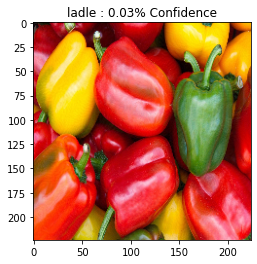

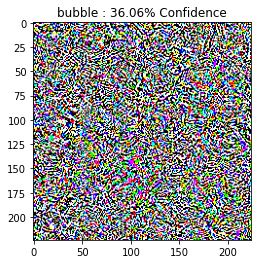

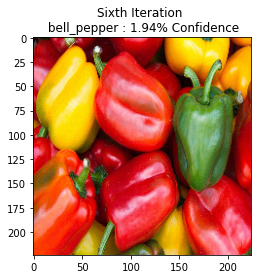

In [21]:
image = adv_x

image_probs = pretrained_model.predict(image)
print(decode_predictions(image_probs)[0][0][2])
print(decode_predictions(image_probs)[0][1][2])
print(decode_predictions(image_probs)[0][2][2])
print(decode_predictions(image_probs)[0][3][2])
print(decode_predictions(image_probs)[0][4][2])

plt.figure()
plt.imshow(image[0]*0.5+0.5) # To change [-1, 1] to [0,1]
_, ll_image_class, ll_class_confidence = get_least_likely_imagenet_label(image_probs)

plt.title('{} : {:.2f}% Confidence'.format(ll_image_class, ll_class_confidence*100))
plt.show()

# Get the input label of the image.
ll_label_index = 618 #ladle
ll_label = tf.one_hot(ll_label_index, image_probs.shape[-1])
ll_label = tf.reshape(ll_label, (1, image_probs.shape[-1]))

perturbations = create_ll_adversarial_pattern(image, ll_label)
_, pertLabel, pertConfidence = get_imagenet_label(pretrained_model.predict(perturbations))
plt.title('{} : {:.2f}% Confidence'.format(pertLabel, pertConfidence*100))
plt.imshow(perturbations[0]*0.5+0.5); # To change [-1, 1] to [0,1]

description = 'Sixth Iteration'

adv_x = image - alpha*perturbations
adv_x = tf.clip_by_value(adv_x, -1, 1)
display_images(adv_x, description)

Iteration 7

0.019353501
0.010056309
0.0073498143
0.0055764373
0.0040217633


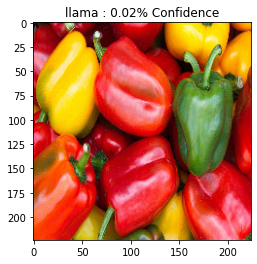

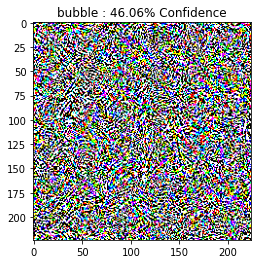

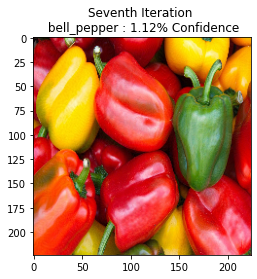

In [22]:
image = adv_x

image_probs = pretrained_model.predict(image)
print(decode_predictions(image_probs)[0][0][2])
print(decode_predictions(image_probs)[0][1][2])
print(decode_predictions(image_probs)[0][2][2])
print(decode_predictions(image_probs)[0][3][2])
print(decode_predictions(image_probs)[0][4][2])

plt.figure()
plt.imshow(image[0]*0.5+0.5) # To change [-1, 1] to [0,1]
_, ll_image_class, ll_class_confidence = get_least_likely_imagenet_label(image_probs)

plt.title('{} : {:.2f}% Confidence'.format(ll_image_class, ll_class_confidence*100))
plt.show()

# Get the input label of the image.
ll_label_index = 355 #llama
ll_label = tf.one_hot(ll_label_index, image_probs.shape[-1])
ll_label = tf.reshape(ll_label, (1, image_probs.shape[-1]))

perturbations = create_ll_adversarial_pattern(image, ll_label)
_, pertLabel, pertConfidence = get_imagenet_label(pretrained_model.predict(perturbations))
plt.title('{} : {:.2f}% Confidence'.format(pertLabel, pertConfidence*100))
plt.imshow(perturbations[0]*0.5+0.5); # To change [-1, 1] to [0,1]

description = 'Seventh Iteration'

adv_x = image - alpha*perturbations
adv_x = tf.clip_by_value(adv_x, -1, 1)
display_images(adv_x, description)

Iteration 8

0.0112041095
0.0071891486
0.0070641707
0.004153447
0.0033901546


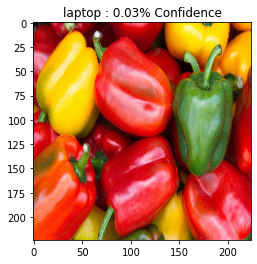

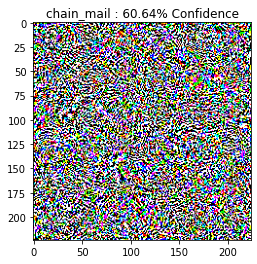

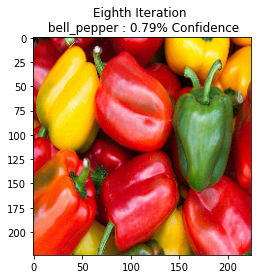

In [23]:
image = adv_x

image_probs = pretrained_model.predict(image)
print(decode_predictions(image_probs)[0][0][2])
print(decode_predictions(image_probs)[0][1][2])
print(decode_predictions(image_probs)[0][2][2])
print(decode_predictions(image_probs)[0][3][2])
print(decode_predictions(image_probs)[0][4][2])

plt.figure()
plt.imshow(image[0]*0.5+0.5) # To change [-1, 1] to [0,1]
_, ll_image_class, ll_class_confidence = get_least_likely_imagenet_label(image_probs)

plt.title('{} : {:.2f}% Confidence'.format(ll_image_class, ll_class_confidence*100))
plt.show()

# Get the input label of the image.
ll_label_index = 620 #laptop
ll_label = tf.one_hot(ll_label_index, image_probs.shape[-1])
ll_label = tf.reshape(ll_label, (1, image_probs.shape[-1]))

perturbations = create_ll_adversarial_pattern(image, ll_label)
_, pertLabel, pertConfidence = get_imagenet_label(pretrained_model.predict(perturbations))
plt.title('{} : {:.2f}% Confidence'.format(pertLabel, pertConfidence*100))
plt.imshow(perturbations[0]*0.5+0.5); # To change [-1, 1] to [0,1]

description = 'Eighth Iteration'

adv_x = image - alpha*perturbations
adv_x = tf.clip_by_value(adv_x, -1, 1)
display_images(adv_x, description)

Iteration 9

0.007900428
0.005399629
0.004404811
0.004210655
0.0037173647


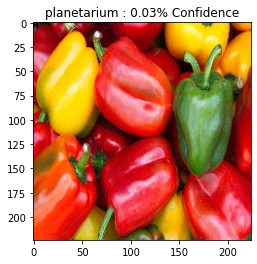

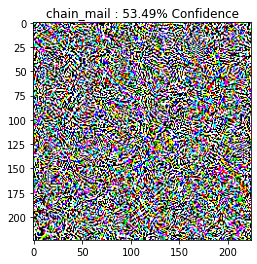

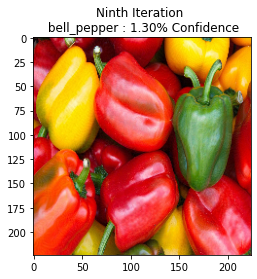

In [24]:
image = adv_x

image_probs = pretrained_model.predict(image)
print(decode_predictions(image_probs)[0][0][2])
print(decode_predictions(image_probs)[0][1][2])
print(decode_predictions(image_probs)[0][2][2])
print(decode_predictions(image_probs)[0][3][2])
print(decode_predictions(image_probs)[0][4][2])

plt.figure()
plt.imshow(image[0]*0.5+0.5) # To change [-1, 1] to [0,1]
_, ll_image_class, ll_class_confidence = get_least_likely_imagenet_label(image_probs)

plt.title('{} : {:.2f}% Confidence'.format(ll_image_class, ll_class_confidence*100))
plt.show()

# Get the input label of the image.
ll_label_index = 727 #planetarium
ll_label = tf.one_hot(ll_label_index, image_probs.shape[-1])
ll_label = tf.reshape(ll_label, (1, image_probs.shape[-1]))

perturbations = create_ll_adversarial_pattern(image, ll_label)
_, pertLabel, pertConfidence = get_imagenet_label(pretrained_model.predict(perturbations))
plt.title('{} : {:.2f}% Confidence'.format(pertLabel, pertConfidence*100))
plt.imshow(perturbations[0]*0.5+0.5); # To change [-1, 1] to [0,1]

description = 'Ninth Iteration'

adv_x = image - alpha*perturbations
adv_x = tf.clip_by_value(adv_x, -1, 1)
display_images(adv_x, description)

Iteration 10

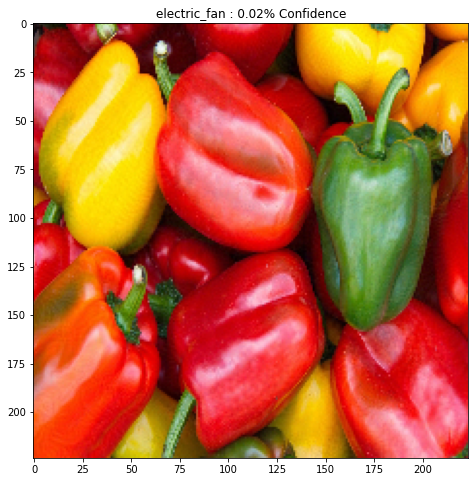

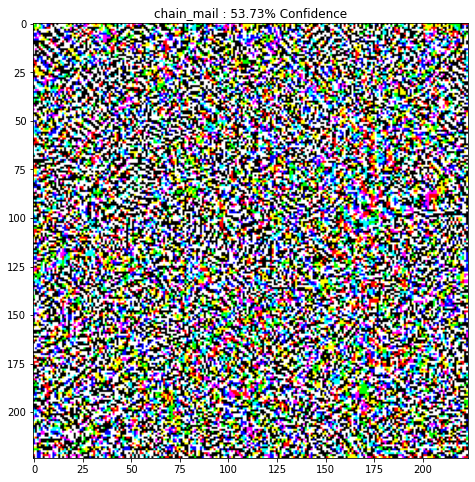

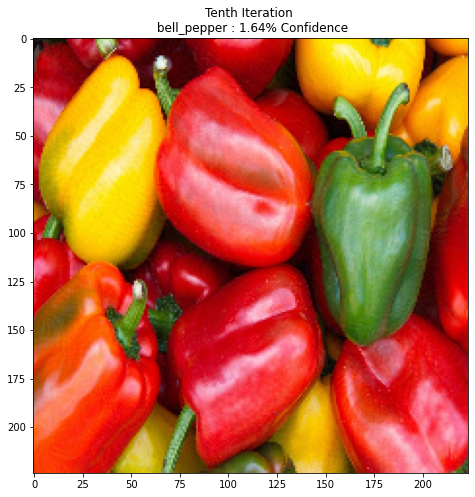

In [61]:
image = adv_x

image_probs = pretrained_model.predict(image)

plt.figure()
plt.imshow(image[0]*0.5+0.5) # To change [-1, 1] to [0,1]
_, ll_image_class, ll_class_confidence = get_least_likely_imagenet_label(image_probs)

plt.title('{} : {:.2f}% Confidence'.format(ll_image_class, ll_class_confidence*100))
plt.show()

# Get the input label of the image.
ll_label_index = 545 #electric fan
ll_label = tf.one_hot(ll_label_index, image_probs.shape[-1])
ll_label = tf.reshape(ll_label, (1, image_probs.shape[-1]))

perturbations = create_ll_adversarial_pattern(image, ll_label)
_, pertLabel, pertConfidence = get_imagenet_label(pretrained_model.predict(perturbations))
plt.title('{} : {:.2f}% Confidence'.format(pertLabel, pertConfidence*100))
plt.imshow(perturbations[0]*0.5+0.5); # To change [-1, 1] to [0,1]

description = 'Tenth Iteration'

adv_x = image - alpha*perturbations
adv_x = tf.clip_by_value(adv_x, -1, 1)
display_images(adv_x, description)

In [62]:
image = adv_x
image_probs = pretrained_model.predict(image)
print(decode_predictions(image_probs))

[[('n07720875', 'bell_pepper', 0.016435593), ('n04131690', 'saltshaker', 0.0044261888), ('n03457902', 'greenhouse', 0.004304746), ('n07745940', 'strawberry', 0.0042851474), ('n03461385', 'grocery_store', 0.0040847925)]]


"As mentioned above, it is not guaranteed that an adversarial image will actually be misclassified—
sometimes the attacker wins, and sometimes the machine learning model wins. We did an experimental comparison of adversarial methods to understand the actual classification accuracy on the
generated images as well as the types of perturbations exploited by each of the methods." Still recognized as peppers, but after 4 iterations confidence is already only around 1%